# Eksploracyjna Analiza Danych(EDA) - Titanic
- data przeprowadzenia analizy: 24.11.2024

## O Danych

Dane o pasażerach Titanica

Zbiór danych zawiera informacje o pasażerach RMS Titanic, który zatonął 15 kwietnia 1912 roku po zderzeniu z górą
lodową. Dane obejmują takie atrybuty jak klasa podróży, wiek, płeć, liczba rodzeństwa/małżonków na pokładzie,
liczba rodziców/dzieci na pokładzie, cena biletu oraz miejsce zaokrętowania.

Zbiór zawiera także informację o tym, czy pasażer przeżył katastrofę.

Titanic przewoził ponad 2,200 osób, z czego ponad 1,500 zginęło, co czyni tę katastrofę jedną z najbardziej
tragicznych w historii morskiej.

Kolumny:

* **pclass** - Klasa biletu
* **survived** - Czy pasażer przeżył katastrofę
* **name** - Imię i nazwisko pasażera
* **sex** - Płeć pasażera
* **age** - Wiek pasażera
* **sibsp** - Liczba rodzeństwa/małżonków na pokładzie
* **parch** - Liczba rodziców/dzieci na pokładzie
* **ticket** - Numer biletu
* **fare** - Cena biletu
* **cabin** - Numer kabiny
* **embarked** - Port, w którym pasażer wszedł na pokład (C = Cherbourg, Q = Queenstown, S = Southampton)
* **boat** - Numer łodzi ratunkowej
* **body** - Numer ciała (jeśli pasażer nie przeżył i ciało zostało odnalezione)
* **home.dest** - Miejsce docelowe

## Metodologia przeprowadzenia EDA
1. Ogólny przegląd danych
2. Analiza brakujących wartości
3. Analiza pojedynczych zmiennych
4. Transformacja danych
5. Analiza relacji między zmiennymi
6. Analiza wartości odstających
7. Wnioski

# 1. Ogólny przegląd danych

In [181]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
import warnings

In [182]:
df = pd.read_csv('26__titanic.csv', sep=",")
#df

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [184]:
df.sample(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1149,3.0,1.0,"Riordan, Miss. Johanna ""Hannah""",female,NaN,0.0,0.0,334915,7.7208,NaN,Q,13,NaN,NaN
1109,3.0,0.0,"Paulner, Mr. Uscher",male,NaN,0.0,0.0,3411,8.7125,NaN,C,NaN,NaN,NaN
388,2.0,1.0,"Davis, Miss. Mary",female,28.0,0.0,0.0,237668,13.0000,NaN,S,13,NaN,"London / Staten Island, NY"
1099,3.0,0.0,"Palsson, Miss. Torborg Danira",female,8.0,3.0,1.0,349909,21.0750,NaN,S,NaN,NaN,NaN
1143,3.0,0.0,"Rice, Master. Eric",male,7.0,4.0,1.0,382652,29.1250,NaN,Q,NaN,NaN,NaN
141,1.0,1.0,"Greenfield, Mrs. Leo David (Blanche Strouse)",female,45.0,0.0,1.0,PC 17759,63.3583,D10 D12,C,7,NaN,"New York, NY"
560,2.0,1.0,"Sinkkonen, Miss. Anna",female,30.0,0.0,0.0,250648,13.0000,NaN,S,10,NaN,"Finland / Washington, DC"
576,2.0,0.0,"Veal, Mr. James",male,40.0,0.0,0.0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT"
986,3.0,0.0,"Maenpaa, Mr. Matti Alexanteri",male,22.0,0.0,0.0,STON/O 2. 3101275,7.1250,NaN,S,NaN,NaN,NaN
376,2.0,1.0,"Collett, Mr. Sidney C Stuart",male,24.0,0.0,0.0,28034,10.5000,NaN,S,9,NaN,"London / Fort Byron, NY"


In [185]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [186]:
df.count()

pclass       1309
survived     1309
name         1309
sex          1309
age          1046
sibsp        1309
parch        1309
ticket       1309
fare         1308
cabin         295
embarked     1307
boat          486
body          121
home.dest     745
dtype: int64

In [187]:
df[df['boat'].notna()].sample(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
288,1.0,1.0,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0.0,0.0,17466,25.9292,D17,S,8,NaN,"Brooklyn, NY"
176,1.0,1.0,"Kenyon, Mrs. Frederick R (Marion)",female,NaN,1.0,0.0,17464,51.8625,D21,S,8,NaN,"Southington / Noank, CT"
945,3.0,1.0,"Lam, Mr. Ali",male,NaN,0.0,0.0,1601,56.4958,NaN,S,C,NaN,NaN
709,3.0,1.0,"Carr, Miss. Helen ""Ellen""",female,16.0,0.0,0.0,367231,7.7500,NaN,Q,16,NaN,"Co Longford, Ireland New York, NY"
1025,3.0,1.0,"Moor, Master. Meier",male,6.0,0.0,1.0,392096,12.4750,E121,S,14,NaN,NaN
11,1.0,1.0,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1.0,0.0,PC 17757,227.5250,C62 C64,C,4,NaN,"New York, NY"
1080,3.0,1.0,"O'Keefe, Mr. Patrick",male,NaN,0.0,0.0,368402,7.7500,NaN,Q,B,NaN,NaN
218,1.0,1.0,"Oliva y Ocana, Dona. Fermina",female,39.0,0.0,0.0,PC 17758,108.9000,C105,C,8,NaN,NaN
376,2.0,1.0,"Collett, Mr. Sidney C Stuart",male,24.0,0.0,0.0,28034,10.5000,NaN,S,9,NaN,"London / Fort Byron, NY"
50,1.0,1.0,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0.0,1.0,PC 17755,512.3292,B51 B53 B55,C,3,NaN,"Germantown, Philadelphia, PA"


## 1.1 Wnioski
- Wartości w kolumnie 'boat' to liczby, ale są uznane jako tekst(object).
- 'cabin' również może posłużyć do dalszej analizy, ale to tekst(object).  
- Dane zawierają kolumny liczbowe zmiennoprzecinkowe oraz kolumny tekstowe. Dane wstępnie można określić jako prawidłowe i przygotowane do dalszej analizy.
- Można zaobserwować w niektórych kolumnach braki w wartościach, należy sprawdzić czy puste wartości będą miały znaczenie przy dalszej analizie.
- Z opisu zbioru danych wynika, że "Titanic przewoził ponad 2,200 osób, z czego ponad 1,500 zginęło". Dane zawierają maksymalnie 1309 wartości, więc można wnioskować że część danych nie została uwzględniona dla tego zbioru danych np. z powodu zbyt dużych niekompletnych informacji na temat danych pasażerów / dane nie obejmują obsługi statku Titanic / inne.

# 2. Analiza brakujących wartości

In [188]:
print("Ilość wartości w kolumnie bez wpisanej wartości - pustych: ")
df.isnull().sum().to_frame().T.style.set_table_styles([
    {'selector': 'thead th', 'props': [('border', '1px solid black')]},  # Obramowanie nagłówków
    {'selector': 'tbody td', 'props': [('border', '1px solid black')]},  # Obramowanie komórek
    {'selector': 'table', 'props': [('border-collapse', 'collapse')]}   # Zapewnienie, że linie nie będą się nakładać
]).hide(axis="index")

Ilość wartości w kolumnie bez wpisanej wartości - pustych: 


pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1,1,1,1,264,1,1,1,2,1015,3,824,1189,565


In [189]:
print("Ilość unikalnych wartości w każdej z kolumn: ")
df.nunique().to_frame().T.style.set_table_styles([
    {'selector': 'thead th', 'props': [('border', '1px solid black')]},  # Obramowanie nagłówków
    {'selector': 'tbody td', 'props': [('border', '1px solid black')]},  # Obramowanie komórek
    {'selector': 'table', 'props': [('border-collapse', 'collapse')]}   # Zapewnienie, że linie nie będą się nakładać
]).hide(axis="index")

Ilość unikalnych wartości w każdej z kolumn: 


pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
3,2,1307,2,98,7,8,929,281,186,3,27,121,369


In [190]:
df[df['pclass'].isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [191]:
df[df['cabin'].isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
9,1.0,0.0,"Artagaveytia, Mr. Ramon",male,71.0,0.0,0.0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"
13,1.0,1.0,"Barber, Miss. Ellen ""Nellie""",female,26.0,0.0,0.0,19877,78.8500,NaN,S,6,NaN,NaN
15,1.0,0.0,"Baumann, Mr. John D",male,NaN,0.0,0.0,PC 17318,25.9250,NaN,S,NaN,NaN,"New York, NY"
23,1.0,1.0,"Bidois, Miss. Rosalie",female,42.0,0.0,0.0,PC 17757,227.5250,NaN,C,4,NaN,NaN
25,1.0,0.0,"Birnbaum, Mr. Jakob",male,25.0,0.0,0.0,13905,26.0000,NaN,C,NaN,148.0,"San Francisco, CA"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [192]:
df[df['age'].isnull()].sample(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1200,3.0,0.0,"Simmons, Mr. John",male,NaN,0.0,0.0,SOTON/OQ 392082,8.0500,NaN,S,NaN,NaN,NaN
973,3.0,0.0,"Lithman, Mr. Simon",male,NaN,0.0,0.0,S.O./P.P. 251,7.5500,NaN,S,NaN,NaN,NaN
918,3.0,0.0,"Kassem, Mr. Fared",male,NaN,0.0,0.0,2700,7.2292,NaN,C,NaN,NaN,NaN
802,3.0,0.0,"Flynn, Mr. John",male,NaN,0.0,0.0,368323,6.9500,NaN,Q,NaN,NaN,NaN
1023,3.0,1.0,"Mockler, Miss. Helen Mary ""Ellie""",female,NaN,0.0,0.0,330980,7.8792,NaN,Q,16,NaN,NaN
1293,3.0,0.0,"Williams, Mr. Howard Hugh ""Harry""",male,NaN,0.0,0.0,A/5 2466,8.0500,NaN,S,NaN,NaN,NaN
1176,3.0,0.0,"Sage, Mr. Douglas Bullen",male,NaN,8.0,2.0,CA. 2343,69.5500,NaN,S,NaN,NaN,NaN
1159,3.0,1.0,"Roth, Miss. Sarah A",female,NaN,0.0,0.0,342712,8.0500,NaN,S,C,NaN,NaN
134,1.0,1.0,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1.0,0.0,17453,89.1042,C92,C,5,NaN,"Paris, France / New York, NY"
984,3.0,1.0,"Madigan, Miss. Margaret ""Maggie""",female,NaN,0.0,0.0,370370,7.7500,NaN,Q,15,NaN,NaN


In [193]:
df[df['embarked'].isnull()].sample(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
284,1.0,1.0,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0.0,0.0,113572,80.0,B28,NaN,6,NaN,"Cincinatti, OH"
168,1.0,1.0,"Icard, Miss. Amelie",female,38.0,0.0,0.0,113572,80.0,B28,NaN,6,NaN,NaN


In [194]:
df[df['boat'].isnull()].sample(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
556,2.0,0.0,"Sharp, Mr. Percival James R",male,27.0,0.0,0.0,244358,26.0000,NaN,S,NaN,NaN,"Hornsey, England"
60,1.0,0.0,"Cavendish, Mr. Tyrell William",male,36.0,1.0,0.0,19877,78.8500,C46,S,NaN,172.0,"Little Onn Hall, Staffs"
864,3.0,0.0,"Henriksson, Miss. Jenny Lovisa",female,28.0,0.0,0.0,347086,7.7750,NaN,S,NaN,NaN,NaN
807,3.0,0.0,"Ford, Miss. Robina Maggie ""Ruby""",female,9.0,2.0,2.0,W./C. 6608,34.3750,NaN,S,NaN,NaN,"Rotherfield, Sussex, England Essex Co, MA"
381,2.0,0.0,"Corbett, Mrs. Walter H (Irene Colvin)",female,30.0,0.0,0.0,237249,13.0000,NaN,S,NaN,NaN,"Provo, UT"
508,2.0,0.0,"Moraweck, Dr. Ernest",male,54.0,0.0,0.0,29011,14.0000,NaN,S,NaN,NaN,"Frankfort, KY"
1104,3.0,0.0,"Panula, Mr. Ernesti Arvid",male,16.0,4.0,1.0,3101295,39.6875,NaN,S,NaN,NaN,NaN
518,2.0,0.0,"Nicholls, Mr. Joseph Charles",male,19.0,1.0,1.0,C.A. 33112,36.7500,NaN,S,NaN,101.0,"Cornwall / Hancock, MI"
602,3.0,0.0,"Abbott, Mr. Rossmore Edward",male,16.0,1.0,1.0,C.A. 2673,20.2500,NaN,S,NaN,190.0,"East Providence, RI"
473,2.0,0.0,"Knight, Mr. Robert J",male,NaN,0.0,0.0,239855,0.0000,NaN,S,NaN,NaN,Belfast


In [195]:
df[df['body'].isnull()].sample(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
227,1.0,1.0,"Pears, Mrs. Thomas (Edith Wearne)",female,22.0,1.0,0.0,113776,66.6000,C2,S,8,NaN,"Isleworth, England"
1109,3.0,0.0,"Paulner, Mr. Uscher",male,NaN,0.0,0.0,3411,8.7125,NaN,C,NaN,NaN,NaN
1199,3.0,0.0,"Shorney, Mr. Charles Joseph",male,NaN,0.0,0.0,374910,8.0500,NaN,S,NaN,NaN,NaN
472,2.0,0.0,"Kirkland, Rev. Charles Leonard",male,57.0,0.0,0.0,219533,12.3500,NaN,Q,NaN,NaN,"Glasgow / Bangor, ME"
840,3.0,0.0,"Haas, Miss. Aloisia",female,24.0,0.0,0.0,349236,8.8500,NaN,S,NaN,NaN,NaN
884,3.0,0.0,"Jensen, Mr. Niels Peder",male,48.0,0.0,0.0,350047,7.8542,NaN,S,NaN,NaN,NaN
394,2.0,0.0,"Dibden, Mr. William",male,18.0,0.0,0.0,S.O.C. 14879,73.5000,NaN,S,NaN,NaN,"New Forest, England"
1180,3.0,0.0,"Sage, Mrs. John (Annie Bullen)",female,NaN,1.0,9.0,CA. 2343,69.5500,NaN,S,NaN,NaN,NaN
868,3.0,0.0,"Holm, Mr. John Fredrik Alexander",male,43.0,0.0,0.0,C 7075,6.4500,NaN,S,NaN,NaN,NaN
342,2.0,1.0,"Becker, Mrs. Allen Oliver (Nellie E Baumgardner)",female,36.0,0.0,3.0,230136,39.0000,F4,S,11,NaN,"Guntur, India / Benton Harbour, MI"


In [196]:
df[df['home.dest'].isnull()].sample(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
944,3.0,0.0,"Laleff, Mr. Kristo",male,NaN,0.0,0.0,349217,7.8958,NaN,S,NaN,NaN,NaN
1060,3.0,1.0,"Nilsson, Miss. Berta Olivia",female,18.0,0.0,0.0,347066,7.7750,NaN,S,D,NaN,NaN
1044,3.0,1.0,"Murphy, Miss. Nora",female,NaN,0.0,0.0,36568,15.5000,NaN,Q,16,NaN,NaN
1290,3.0,1.0,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1.0,0.0,363272,7.0000,NaN,S,NaN,NaN,NaN
865,3.0,0.0,"Henry, Miss. Delia",female,NaN,0.0,0.0,382649,7.7500,NaN,Q,NaN,NaN,NaN
1185,3.0,0.0,"Samaan, Mr. Hanna",male,NaN,2.0,0.0,2662,21.6792,NaN,C,NaN,NaN,NaN
1002,3.0,1.0,"McCoy, Miss. Alicia",female,NaN,2.0,0.0,367226,23.2500,NaN,Q,16,NaN,NaN
1078,3.0,1.0,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0.0,0.0,330959,7.8792,NaN,Q,NaN,NaN,NaN
663,3.0,0.0,"Balkic, Mr. Cerin",male,26.0,0.0,0.0,349248,7.8958,NaN,S,NaN,NaN,NaN
886,3.0,1.0,"Jermyn, Miss. Annie",female,NaN,0.0,0.0,14313,7.7500,NaN,Q,D,NaN,NaN


## 2.1 Wnioski
- Wiersz o indeksie 1309 jest w całości pusta, więc każda z kolumn w wartościach pustych posiada jedną pozycję pustą dodatkowo. Do daleszej analizy należy usunąć pusty wiersz.
- Wartości puste 'embarked' posiadają taki sam numer biletu, ale prawdopodobnie nie ma to wpływu, gdyż numer biletu może być taki sam ze względu na wspólny zakup danych osób.
- Puste pola 'boat' są powiązane z przeżywalnością 'survived', można wstępnie wnioskować, że osoby które nie dostały się na łódź nie przeżywały(wniosek z próbki 10 wierszy) lub miały małą przeżywalność.
- Puste pola w 'body' wynikają z tego, że numer nie był nadawany jeżeli osoba przeżyła lub ciało nie zostało odnalezione.
- 'age' oraz 'home.dest' - z próbki danych ciężko wynioskować czym są spowodowany brak danych.

# 3. Analiza pojedynczych zmiennych

Histogramy dla danych liczbowych:


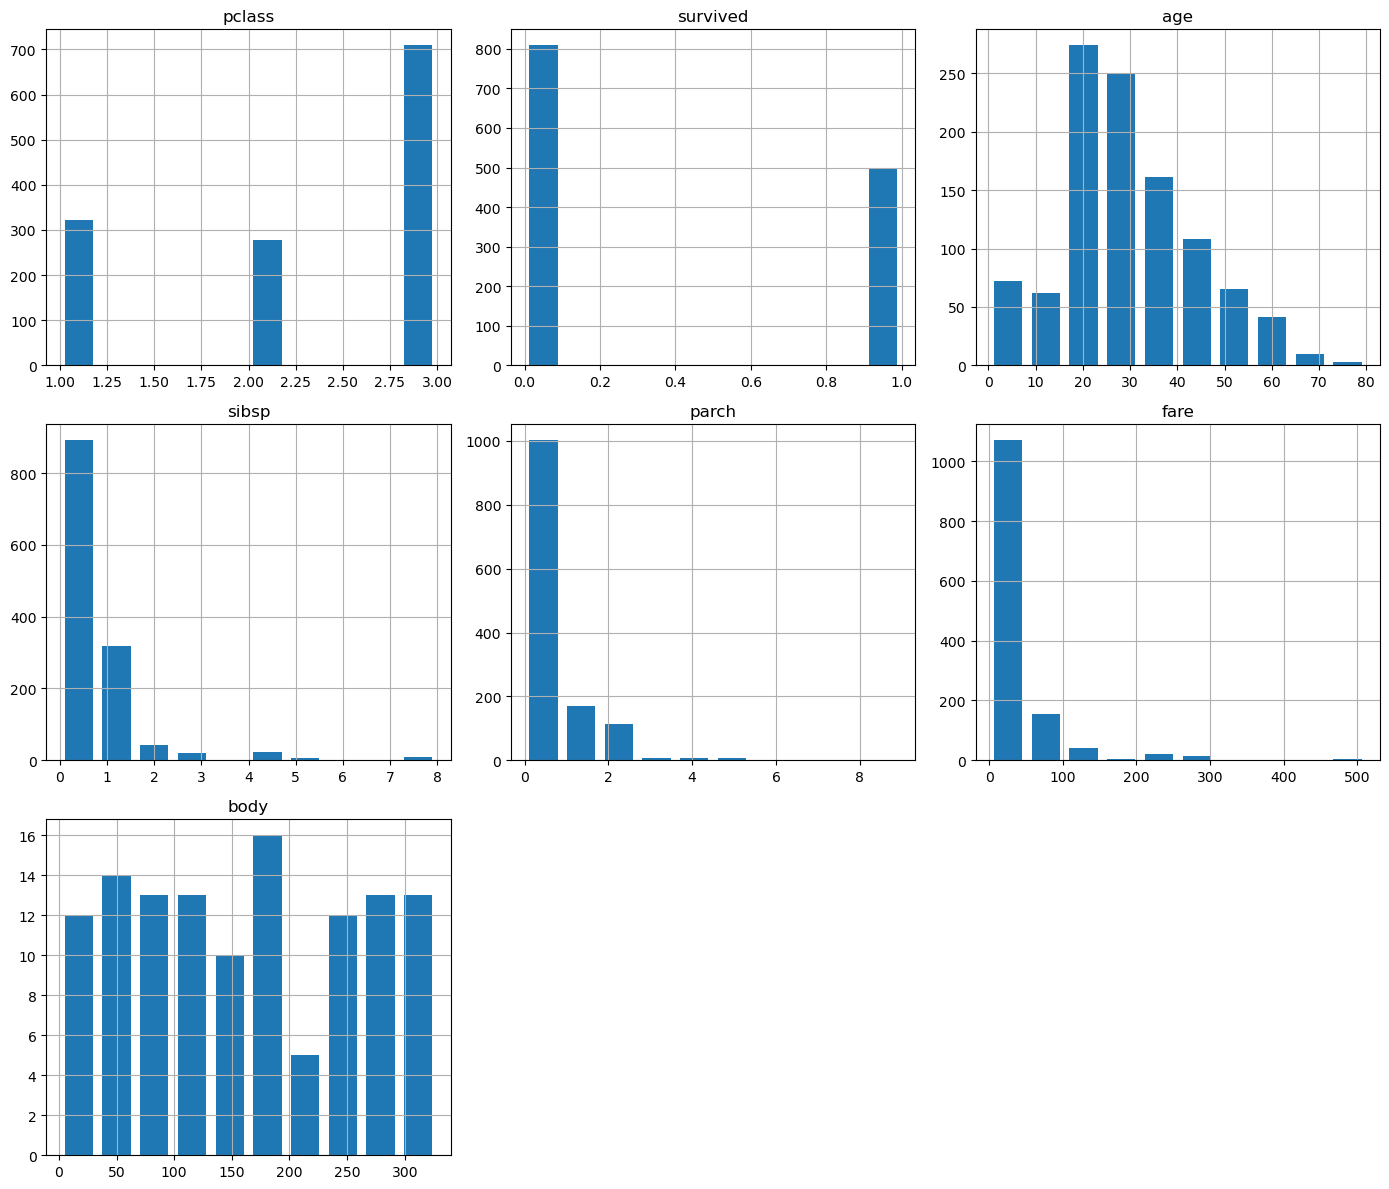

In [198]:
print("Histogramy dla danych liczbowych:")
df.hist(bins=10, figsize=(14, 12), rwidth=0.75)
plt.tight_layout()
plt.show()

In [199]:
print("Procentowa ilość osób w danej klasie podczas rejsu:")
((df['pclass'].value_counts(normalize=True) * 100).round(2).astype(str) + '%').to_frame().T

Procentowa ilość osób w danej klasie podczas rejsu:


,3.0,1.0,2.0
pclass,54.16%,24.68%,21.16%


In [200]:
print(f"Ilość wystąpień 'cabin': {df['cabin'].value_counts().sum()}")


Ilość wystąpień 'cabin': 295


In [201]:
print(f"Ilość unikalnych wartości dla 'cabin': {df['cabin'].nunique()}") 


Ilość unikalnych wartości dla 'cabin': 186


In [202]:
pasazerowie_bez_kabiny = 1308 - 295
pasazerowie_bez_kabiny_procent = pasazerowie_bez_kabiny / 1308 * 100
pasazerowie_bez_kabiny_procent = round(pasazerowie_bez_kabiny_procent, 2)
print(f"Ilość osób bez kabiny: {pasazerowie_bez_kabiny} czyli {pasazerowie_bez_kabiny_procent} %")


Ilość osób bez kabiny: 1013 czyli 77.45 %


In [203]:
print(f"Ilość unikalnych wartości dla 'home.dest': {df['home.dest'].nunique()}")


Ilość unikalnych wartości dla 'home.dest': 369


In [204]:
print("Przykładowe miejsca docelowe pasażerów:")
df[df['home.dest'].notnull()]['home.dest'].sample(10).to_frame()

Przykładowe miejsca docelowe pasażerów:


,home.dest
685,"Treherbert, Cardiff, Wales"
811,"Rotherfield, Sussex, England Essex Co, MA"
825,"Wiltshire, England Niagara Falls, NY"
81,"Milwaukee, WI"
214,"Lexington, MA"
329,"Warwick, England"
661,"London Skanteales, NY"
450,Southampton
839,"Myren, Sweden New York, NY"
346,"Elmira, NY / Orange, NJ"


In [205]:
print(f"Ilość portów w których wsiadali pasażerowie w zbiorze danych: {df['embarked'].nunique()}")

Ilość portów w których wsiadali pasażerowie w zbiorze danych: 3


In [206]:
print(f"Ilość odnalezionych ciał, którym został nadany numer: {df['body'].nunique()}")

Ilość odnalezionych ciał, którym został nadany numer: 121


In [207]:
df[df['embarked'].isnull()].sample(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
284,1.0,1.0,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0.0,0.0,113572,80.0,B28,NaN,6,NaN,"Cincinatti, OH"
168,1.0,1.0,"Icard, Miss. Amelie",female,38.0,0.0,0.0,113572,80.0,B28,NaN,6,NaN,NaN


In [208]:
df['boat'].notnull().value_counts()

False    824
True     486
Name: boat, dtype: int64

## 3.1 Wnioski

- Większość pasażerów miała 20-40 lat
- Podczas rejsu były 3 klasy. 54% osób podróżowało 3 klasą, 24% 1 klasą, 21% 3 klasą
- Większość osób podczas rejsu nie posiadała rodzeństwa/małżonków/rodziców/dzieci na pokładzie
- 62% osób nie przeżyło katastrofy Titanica
- 77,45% osób nie posiadało kabiny. Ilość osób z 2 klasy i 3 klasy to 78%, więc można spodziewać się, że kabiny ujęte w zbiorze danych były wyłącznie dla osób z 1 klasy podczas rejsu.
- Miejsca docelowe pasażerów są bardzo zróżnicowanymi wartościami. W wartościach można zawuważyć miejsca również z głębi lądu, więc nie można zakładać że są one dalszą częścią rejsu po przesiadce w Nowym Yorku. 
- Ilość portów(3) w których wsiadali pasażerowie('embarked'), zgadza się.
- 'boat' numer łodzi ratunkowej jest przypisany do 823 osób

# 4. Transformacja danych

Z wcześniejszych etapów EDA wynika, że należy wprawodzić następujące zmiany:
- Usunąć w całości wiersz o indeksie 1309 dla wszystkich kolumn, gdyż jest w całości pusty.
- Stworzyć osobną kolumnę do analizy danych 'boat, gdzie numer łodzi to 1, a brak numeru łodzi, to 0
  Stworzyć osobną kolumnę do analizy danych 'cabin, gdzie numer kabiny to 1, a brak numeru kabiny, to 0

In [209]:
#df = df.dropna(how='all') #usuwa wszystkie wiersze całkowicie puste
df = df.drop(index=1309) #usuwa po indeksie

In [210]:
print("Test czy usunęło wiersz 1309, jeżeli są wartości 0 w niektórych kolumnach, powiodło się.") 
print("Ilość wartości w kolumnie bez wpisanej wartości - pustych: ")
df.isnull().sum().to_frame().T.style.set_table_styles([
    {'selector': 'thead th', 'props': [('border', '1px solid black')]},  # Obramowanie nagłówków
    {'selector': 'tbody td', 'props': [('border', '1px solid black')]},  # Obramowanie komórek
    {'selector': 'table', 'props': [('border-collapse', 'collapse')]}   # Zapewnienie, że linie nie będą się nakładać
]).hide(axis="index")

Test czy usunęło wiersz 1309, jeżeli są wartości 0 w niektórych kolumnach, powiodło się.
Ilość wartości w kolumnie bez wpisanej wartości - pustych: 


pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,0,0,0,263,0,0,0,1,1014,2,823,1188,564


In [211]:
df['boat_inside'] = df['boat'].notna().astype(int)
df['boat_inside'].sample(5)

861     0
846     0
607     1
1163    0
545     0
Name: boat_inside, dtype: int32

In [212]:
df['cabin_had'] = df['cabin'].notna().astype(int)
df['cabin_had'].sample(5)

967     0
482     0
216     1
1066    0
1185    0
Name: cabin_had, dtype: int32

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pclass       1309 non-null   float64
 1   survived     1309 non-null   float64
 2   name         1309 non-null   object 
 3   sex          1309 non-null   object 
 4   age          1046 non-null   float64
 5   sibsp        1309 non-null   float64
 6   parch        1309 non-null   float64
 7   ticket       1309 non-null   object 
 8   fare         1308 non-null   float64
 9   cabin        295 non-null    object 
 10  embarked     1307 non-null   object 
 11  boat         486 non-null    object 
 12  body         121 non-null    float64
 13  home.dest    745 non-null    object 
 14  boat_inside  1309 non-null   int32  
 15  cabin_had    1309 non-null   int32  
dtypes: float64(7), int32(2), object(7)
memory usage: 153.5+ KB


# 5. Analiza relacji między zmiennymi

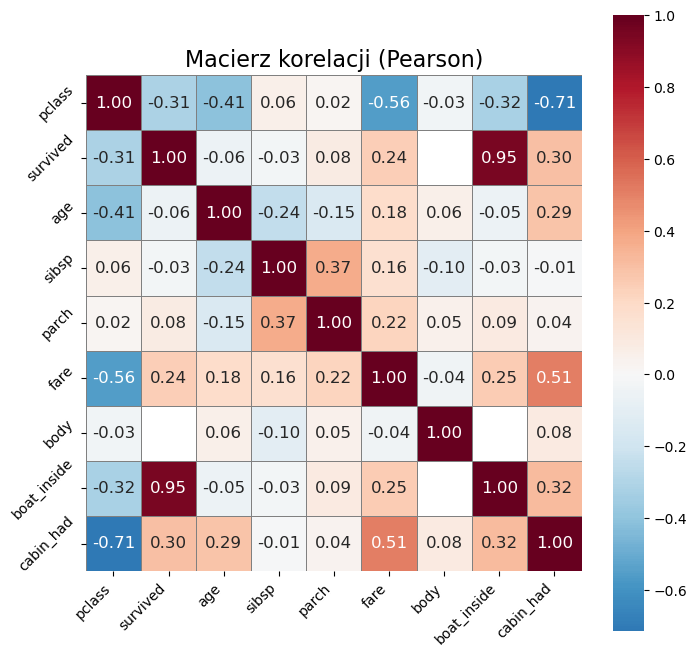

In [215]:
# Wybieramy tylko kolumny numeryczne i obliczamy korelację (domyślnie metoda Pearsona)
numeric_df = df.select_dtypes(include=["number"])
correlation_matrix = numeric_df.corr()  # Domyślnie używa korelacji Pearsona

# Tworzymy wykres cieplny (heatmap) z niestandardową paletą kolorów
plt.figure(figsize=(8, 10))  # Zwiększenie rozmiaru wykresu
sns.heatmap(correlation_matrix, annot=True, cmap="RdBu_r", fmt=".2f", cbar=True,
            annot_kws={"size": 12}, linewidths=0.5, linecolor='gray', 
            cbar_kws={"shrink": 0.8}, center=0, square=True)

# Dodanie tytułu oraz poprawa ustawienia etykiet
plt.title("Macierz korelacji (Pearson)", fontsize=16)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=45, ha="right")

# Wyświetlanie wykresu
plt.show()

## 5.1 Długo ładujący się wykres

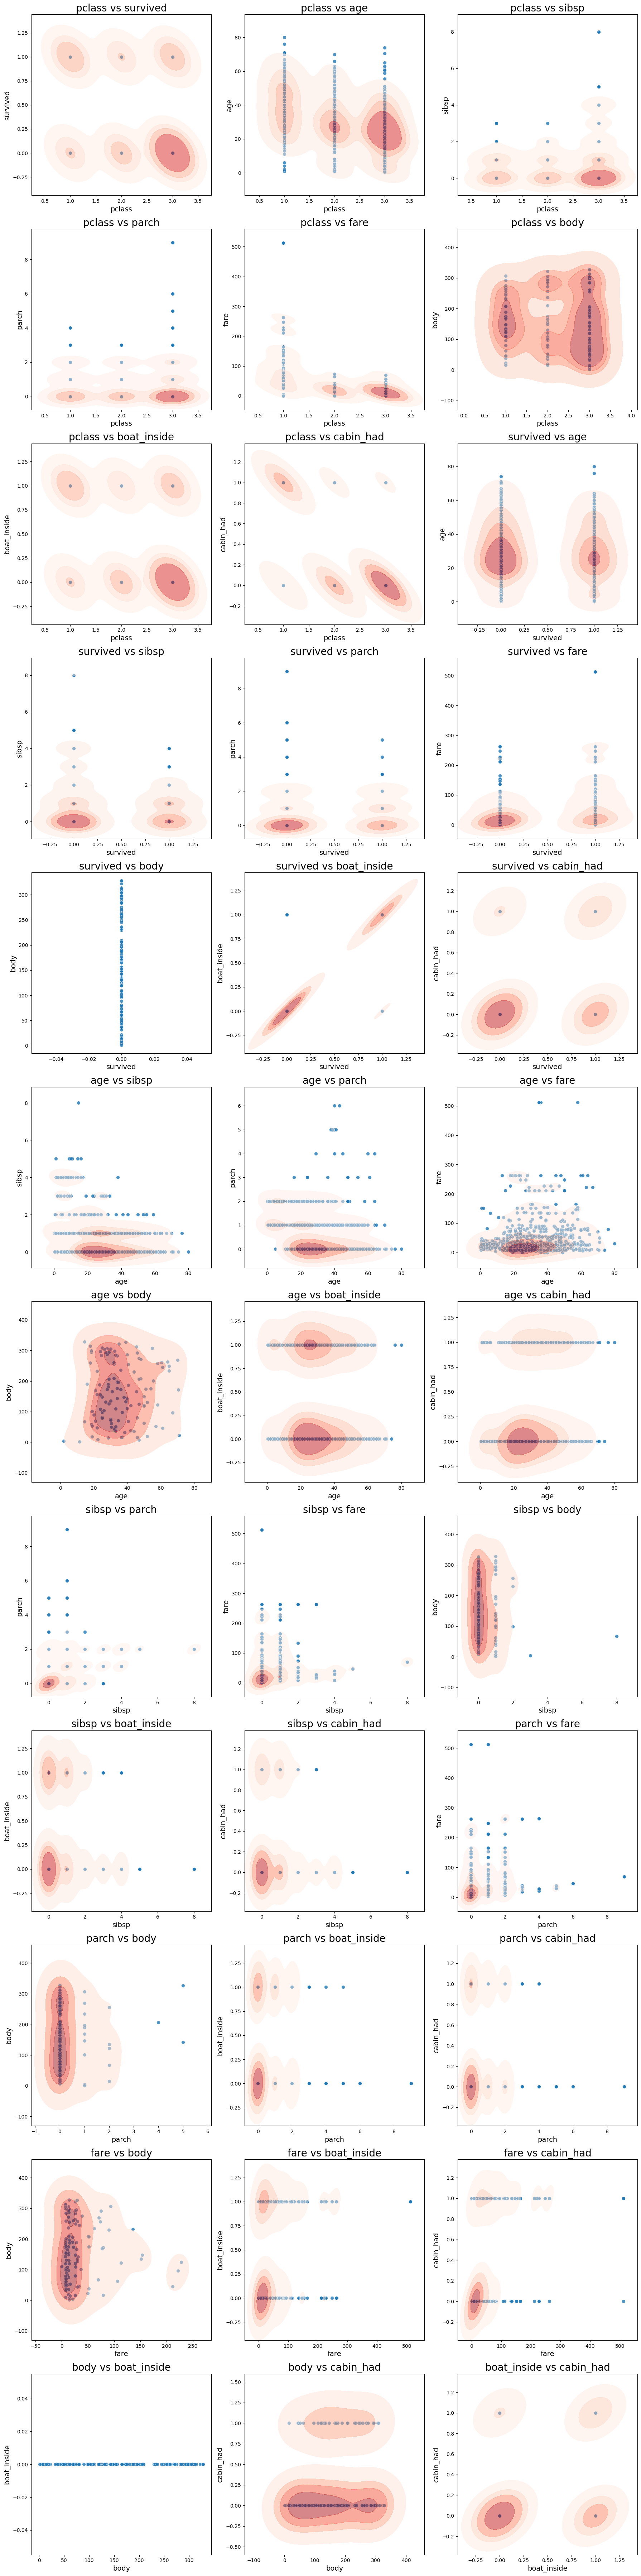

In [224]:
# Wyłączenie ostrzeżeń związanych z KDE
warnings.filterwarnings("ignore", category=UserWarning, message=".*KDE cannot be estimated.*")

# Wybierz tylko kolumny numeryczne
numeric_columns = df.select_dtypes(include=['number']).columns
valid_columns = [col for col in numeric_columns if df[col].nunique() > 1]

# Generowanie wszystkich możliwych par zmiennych numerycznych
pairs = [(valid_columns[i], valid_columns[j]) for i in range(len(valid_columns)) for j in range(i+1, len(valid_columns))]

# Liczba wykresów
num_plots = len(pairs)

# Rozmiar siatki: oblicz liczbę wierszy i kolumn
cols = 3  # Liczba kolumn
rows = math.ceil(num_plots / cols)  # Liczba wierszy

# Tworzenie figur i osi
fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 6))
axes = axes.flatten()  # Flatten, aby łatwo iterować przez osie

# Generowanie wykresów
for i, (col1, col2) in enumerate(pairs):
    # Scatter plot
    sns.scatterplot(data=df, x=col1, y=col2, ax=axes[i], alpha=0.8, s=50)  # alpha dla przezroczystości punktów
    
    # KDE plot (jeśli nie ma problemów z jednorodnymi danymi)
    if df[col1].nunique() > 1 and df[col2].nunique() > 1:
        sns.kdeplot(data=df, x=col1, y=col2, fill=True, cmap='Reds', levels=5, alpha=0.5, ax=axes[i])

    # Dodanie tytułów i etykiet
    axes[i].set_title(f'{col1} vs {col2}', fontsize=20)
    axes[i].set_xlabel(col1, fontsize=14)
    axes[i].set_ylabel(col2, fontsize=14)

# Usunięcie pustych osi, jeśli nie wszystkie są użyte
for i in range(len(pairs), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


In [217]:
print("Średnia przeżywalność dla poszczególnej klasy biletu:")
(df.groupby('pclass')['survived'].mean()*100).apply(lambda x: f'{x:.2f}%')

Średnia przeżywalność dla poszczególnej klasy biletu:


pclass
1.0    61.92%
2.0    42.96%
3.0    25.53%
Name: survived, dtype: object

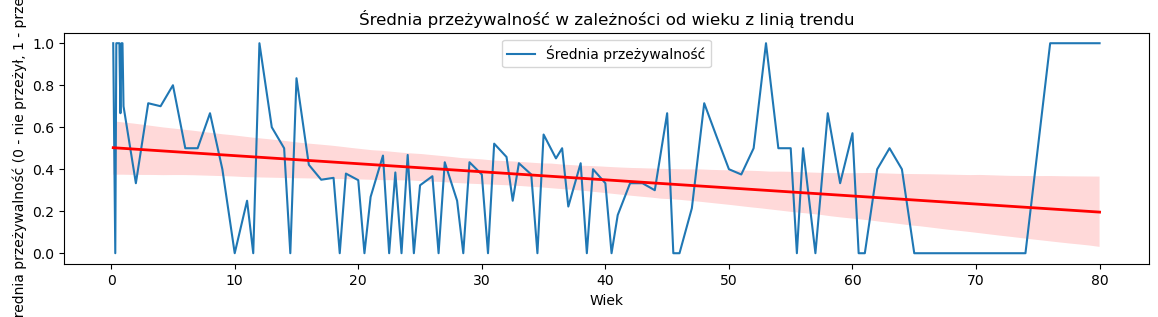

In [218]:
# Grupa po wieku i obliczenie średniej przeżywalności dla każdego wieku
age_survival = df.groupby('age')['survived'].mean().reset_index()

# Tworzenie wykresu
plt.figure(figsize=(14, 3))
sns.lineplot(x='age', y='survived', data=age_survival, label='Średnia przeżywalność')

# Dodanie czerwonej linii trendu
sns.regplot(x='age', y='survived', data=age_survival, scatter=False, color='red', line_kws={'lw': 2})

# Dodatkowe ustawienia wykresu
plt.title('Średnia przeżywalność w zależności od wieku z linią trendu')
plt.xlabel('Wiek')
plt.ylabel('Średnia przeżywalność (0 - nie przeżył, 1 - przeżył)')

# Wyświetlenie wykresu
plt.show()

In [219]:
print("Średnia przeżywalność dla osób znajdujących się w łodzi:")
(df.groupby('boat_inside')['survived'].mean()*100).apply(lambda x: f'{x:.2f}%')

Średnia przeżywalność dla osób znajdujących się w łodzi:


boat_inside
0     2.79%
1    98.15%
Name: survived, dtype: object

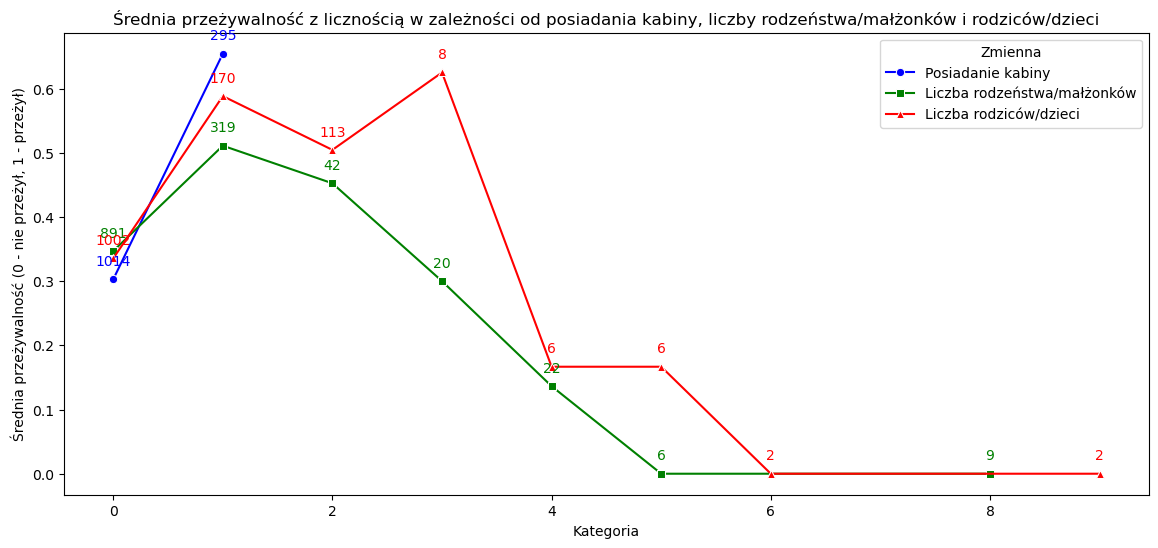

In [220]:
# Grupowanie po 'cabin_had', 'sibsp', 'parch' z obliczeniem średniej i liczności
cabin_had_stats = df.groupby('cabin_had').agg({'survived': ['mean', 'count']}).reset_index()
cabin_had_stats.columns = ['cabin_had', 'mean_survived', 'count']

sibsp_stats = df.groupby('sibsp').agg({'survived': ['mean', 'count']}).reset_index()
sibsp_stats.columns = ['sibsp', 'mean_survived', 'count']

parch_stats = df.groupby('parch').agg({'survived': ['mean', 'count']}).reset_index()
parch_stats.columns = ['parch', 'mean_survived', 'count']

# Tworzenie wykresu
plt.figure(figsize=(14, 6))

# Dodanie linii dla posiadania kabiny (cabin_had)
sns.lineplot(x='cabin_had', y='mean_survived', data=cabin_had_stats, label='Posiadanie kabiny', color='blue', marker='o')
for i, row in cabin_had_stats.iterrows():
    plt.annotate(f"{int(row['count'])}", (row['cabin_had'], row['mean_survived']), textcoords="offset points", xytext=(0, 10), ha='center', color='blue')

# Dodanie linii dla liczby rodzeństwa/małżonków (sibsp)
sns.lineplot(x='sibsp', y='mean_survived', data=sibsp_stats, label='Liczba rodzeństwa/małżonków', color='green', marker='s')
for i, row in sibsp_stats.iterrows():
    plt.annotate(f"{int(row['count'])}", (row['sibsp'], row['mean_survived']), textcoords="offset points", xytext=(0, 10), ha='center', color='green')

# Dodanie linii dla liczby rodziców/dzieci (parch)
sns.lineplot(x='parch', y='mean_survived', data=parch_stats, label='Liczba rodziców/dzieci', color='red', marker='^')
for i, row in parch_stats.iterrows():
    plt.annotate(f"{int(row['count'])}", (row['parch'], row['mean_survived']), textcoords="offset points", xytext=(0, 10), ha='center', color='red')

# Dodatkowe ustawienia wykresu
plt.title('Średnia przeżywalność z licznością w zależności od posiadania kabiny, liczby rodzeństwa/małżonków i rodziców/dzieci')
plt.xlabel('Kategoria')
plt.ylabel('Średnia przeżywalność (0 - nie przeżył, 1 - przeżył)')
plt.legend(title='Zmienna')

# Wyświetlenie wykresu
plt.show()

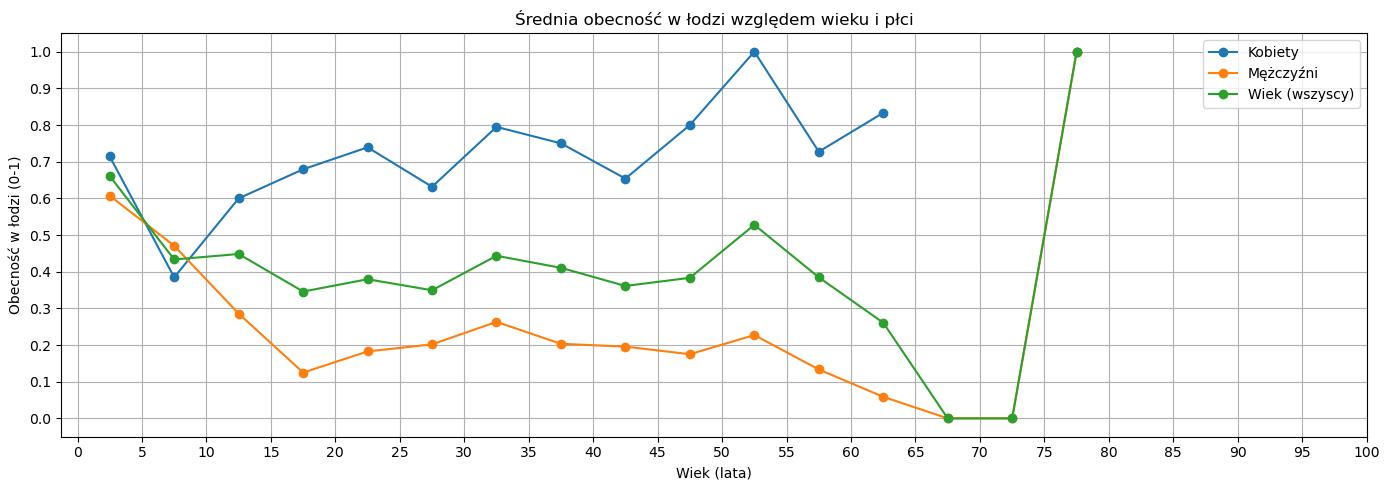

In [221]:
# Grupowanie danych według wieku i płci
ages = np.arange(0, 101, 5)  # Przedziały wieku (0-100 co 5 lat)

# Funkcja pomocnicza do obliczania średniej obecności w łodzi dla danych przedziałów wieku
def calc_mean_presence(df, age_bins, sex=None):
    if sex:
        df = df[df['sex'] == sex]
    grouped = df.groupby(pd.cut(df['age'], bins=age_bins))['boat_inside'].mean()
    grouped.index = [interval.mid for interval in grouped.index]  # Środek przedziału jako indeks
    return grouped

# Oblicz średnią obecność w łodzi dla kobiet, mężczyzn i wszystkich
age_bins = np.arange(0, 105, 5)  # Przedziały wiekowe (0-100 co 5 lat)
female_presence = calc_mean_presence(df, age_bins, sex='female')
male_presence = calc_mean_presence(df, age_bins, sex='male')
overall_presence = calc_mean_presence(df, age_bins)

# Tworzenie wykresu
plt.figure(figsize=(14, 5))

# Linie na wykresie
plt.plot(female_presence.index, female_presence.values, label='Kobiety', marker='o')
plt.plot(male_presence.index, male_presence.values, label='Mężczyźni', marker='o')
plt.plot(overall_presence.index, overall_presence.values, label='Wiek (wszyscy)', marker='o')

# Ustawienia wykresu
plt.title('Średnia obecność w łodzi względem wieku i płci')
plt.xlabel('Wiek (lata)')
plt.ylabel('Obecność w łodzi (0-1)')
plt.xticks(ticks=np.arange(0, 101, 5))  # Przedziały na osi X co 5 lat
plt.yticks(ticks=np.arange(0, 1.1, 0.1))  # Przedziały na osi Y co 0.1
plt.grid(True)
plt.legend()
plt.tight_layout()

# Wyświetlenie wykresu
plt.show()


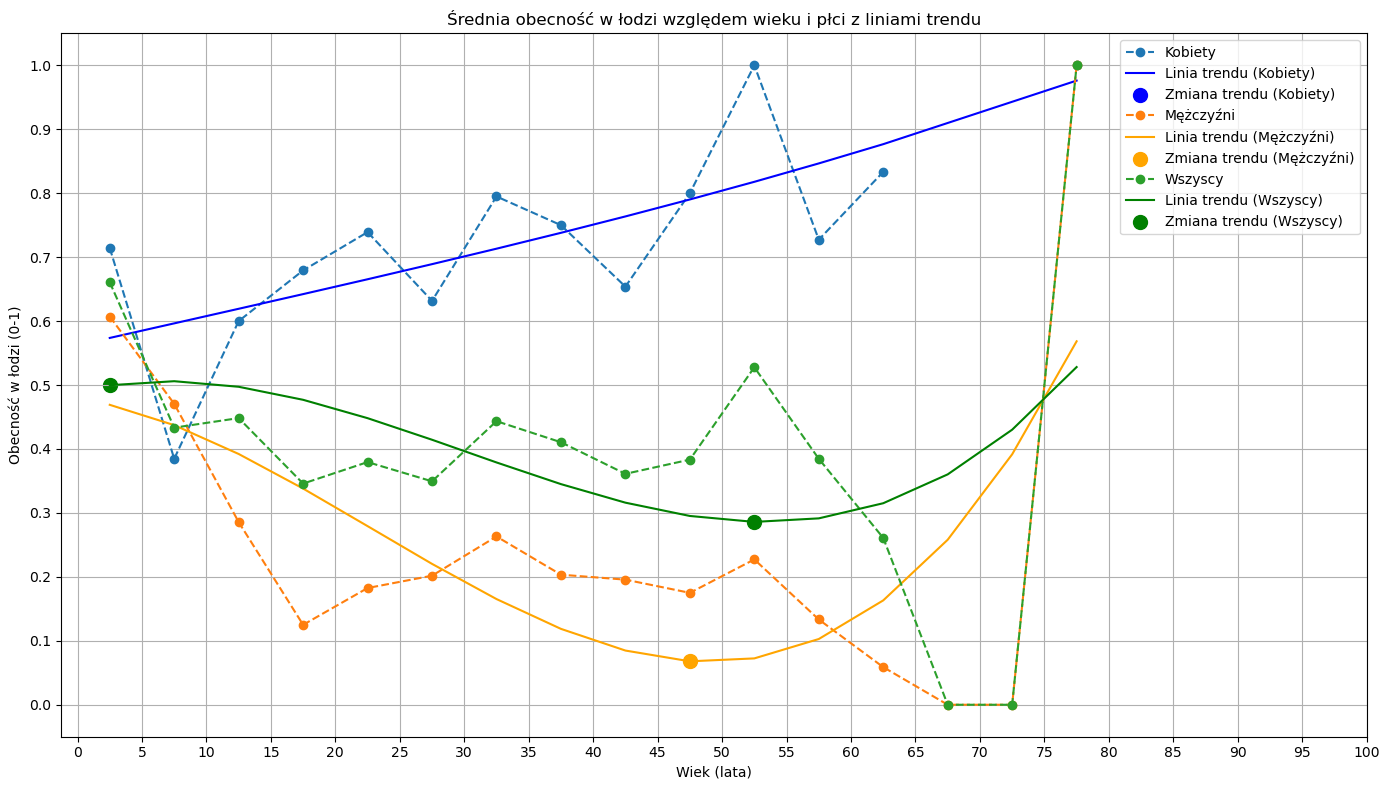

In [222]:
# Funkcja pomocnicza do obliczania średniej obecności w łodzi dla danych przedziałów wieku
def calc_mean_presence(df, age_bins, sex=None):
    if sex:
        df = df[df['sex'] == sex]
    grouped = df.groupby(pd.cut(df['age'], bins=age_bins))['boat_inside'].mean()
    grouped.index = [interval.mid for interval in grouped.index]  # Środek przedziału jako indeks
    return grouped

# Oblicz średnią obecność w łodzi dla kobiet, mężczyzn i wszystkich
age_bins = np.arange(0, 105, 5)  # Przedziały wiekowe (0-100 co 5 lat)
female_presence = calc_mean_presence(df, age_bins, sex='female')
male_presence = calc_mean_presence(df, age_bins, sex='male')
overall_presence = calc_mean_presence(df, age_bins)

# Funkcja do obliczania linii trendu i punktów przegięcia
def calculate_trend_and_inflections(x, y, degree=3):
    # Usunięcie brakujących wartości
    mask = ~np.isnan(y)
    x, y = x[mask], y[mask]  # Dopasowanie do tylko ważnych wartości

    # Dopasowanie wielomianu
    coeffs = np.polyfit(x, y, degree)
    trendline = np.polyval(coeffs, x)

    # Pochodna pierwszego stopnia
    derivative = np.gradient(trendline, x)
    # Szukanie punktów zmiany trendu (zmiana znaku pochodnej)
    inflection_points = x[np.where(np.diff(np.sign(derivative)) != 0)]
    return x, trendline, inflection_points

# Wyliczanie linii trendu i punktów przegięcia
female_x, female_trend, female_inflections = calculate_trend_and_inflections(
    female_presence.index.to_numpy(), female_presence.values
)
male_x, male_trend, male_inflections = calculate_trend_and_inflections(
    male_presence.index.to_numpy(), male_presence.values
)
overall_x, overall_trend, overall_inflections = calculate_trend_and_inflections(
    overall_presence.index.to_numpy(), overall_presence.values
)

# Tworzenie wykresu
plt.figure(figsize=(14, 8))

# Linie na wykresie
plt.plot(female_presence.index, female_presence.values, label='Kobiety', marker='o', linestyle='--')
plt.plot(female_x, female_trend, label='Linia trendu (Kobiety)', color='blue')
plt.scatter(female_inflections, np.interp(female_inflections, female_x, female_trend), color='blue', s=100, label='Zmiana trendu (Kobiety)')

plt.plot(male_presence.index, male_presence.values, label='Mężczyźni', marker='o', linestyle='--')
plt.plot(male_x, male_trend, label='Linia trendu (Mężczyźni)', color='orange')
plt.scatter(male_inflections, np.interp(male_inflections, male_x, male_trend), color='orange', s=100, label='Zmiana trendu (Mężczyźni)')

plt.plot(overall_presence.index, overall_presence.values, label='Wszyscy', marker='o', linestyle='--')
plt.plot(overall_x, overall_trend, label='Linia trendu (Wszyscy)', color='green')
plt.scatter(overall_inflections, np.interp(overall_inflections, overall_x, overall_trend), color='green', s=100, label='Zmiana trendu (Wszyscy)')

# Ustawienia wykresu
plt.title('Średnia obecność w łodzi względem wieku i płci z liniami trendu')
plt.xlabel('Wiek (lata)')
plt.ylabel('Obecność w łodzi (0-1)')
plt.xticks(ticks=np.arange(0, 101, 5))  # Przedziały na osi X co 5 lat
plt.yticks(ticks=np.arange(0, 1.1, 0.1))  # Przedziały na osi Y co 0.1
plt.grid(True)
plt.legend()
plt.tight_layout()

# Wyświetlenie wykresu
plt.show()



## 5.2 Wnioski
- Z danych wynika, że pierwsza klasa biletu wiązała się z posiadaniem kabiny, wyższą ceną biletu, wyższym wiekiem pasażerów oraz większą przeżywalnością
- Im wyższa klasa biletu tym większa przeżywalność wśród pasażerów
- Średnia przeżywalność dla młodszych była większa, wraz ze wzrostem wieku śmiertelność wzrasta.
- Osoby, które znalazły się w łodzi ratunkowej miały przeżywalność na poziomie 98,15%
- Posiadanie kabiny jest powiązane z większą przeżywalnością, co było już potwierdzone w przypadku biletu pierwszej klasy, który uprawniał do kabiny
- Według wstępnego sprawdzenia liczba rodzeństwa/małżonków oraz liczba rodziców/dzieci powiązane są z średnio z większą przeżywalnością. Jednak dane wymagają głębszego sprawdzenia, gdyż w trakcie rejsu było zdecydowanie więcej osób podróżujących samotnie i średnia może nie przedstawiać prawidłowej zależności.
- Do łodzi ratunkowych trafiały przede wszystkim kobiety i dzieci. Chłopcy do wieku około 10 lat trafiali do łodzi ratunkowych tak samo jak dziewczynki, ale po 10 roku życia ich liczba zdecydowanie spada.

# 6. Analiza wartości odstających

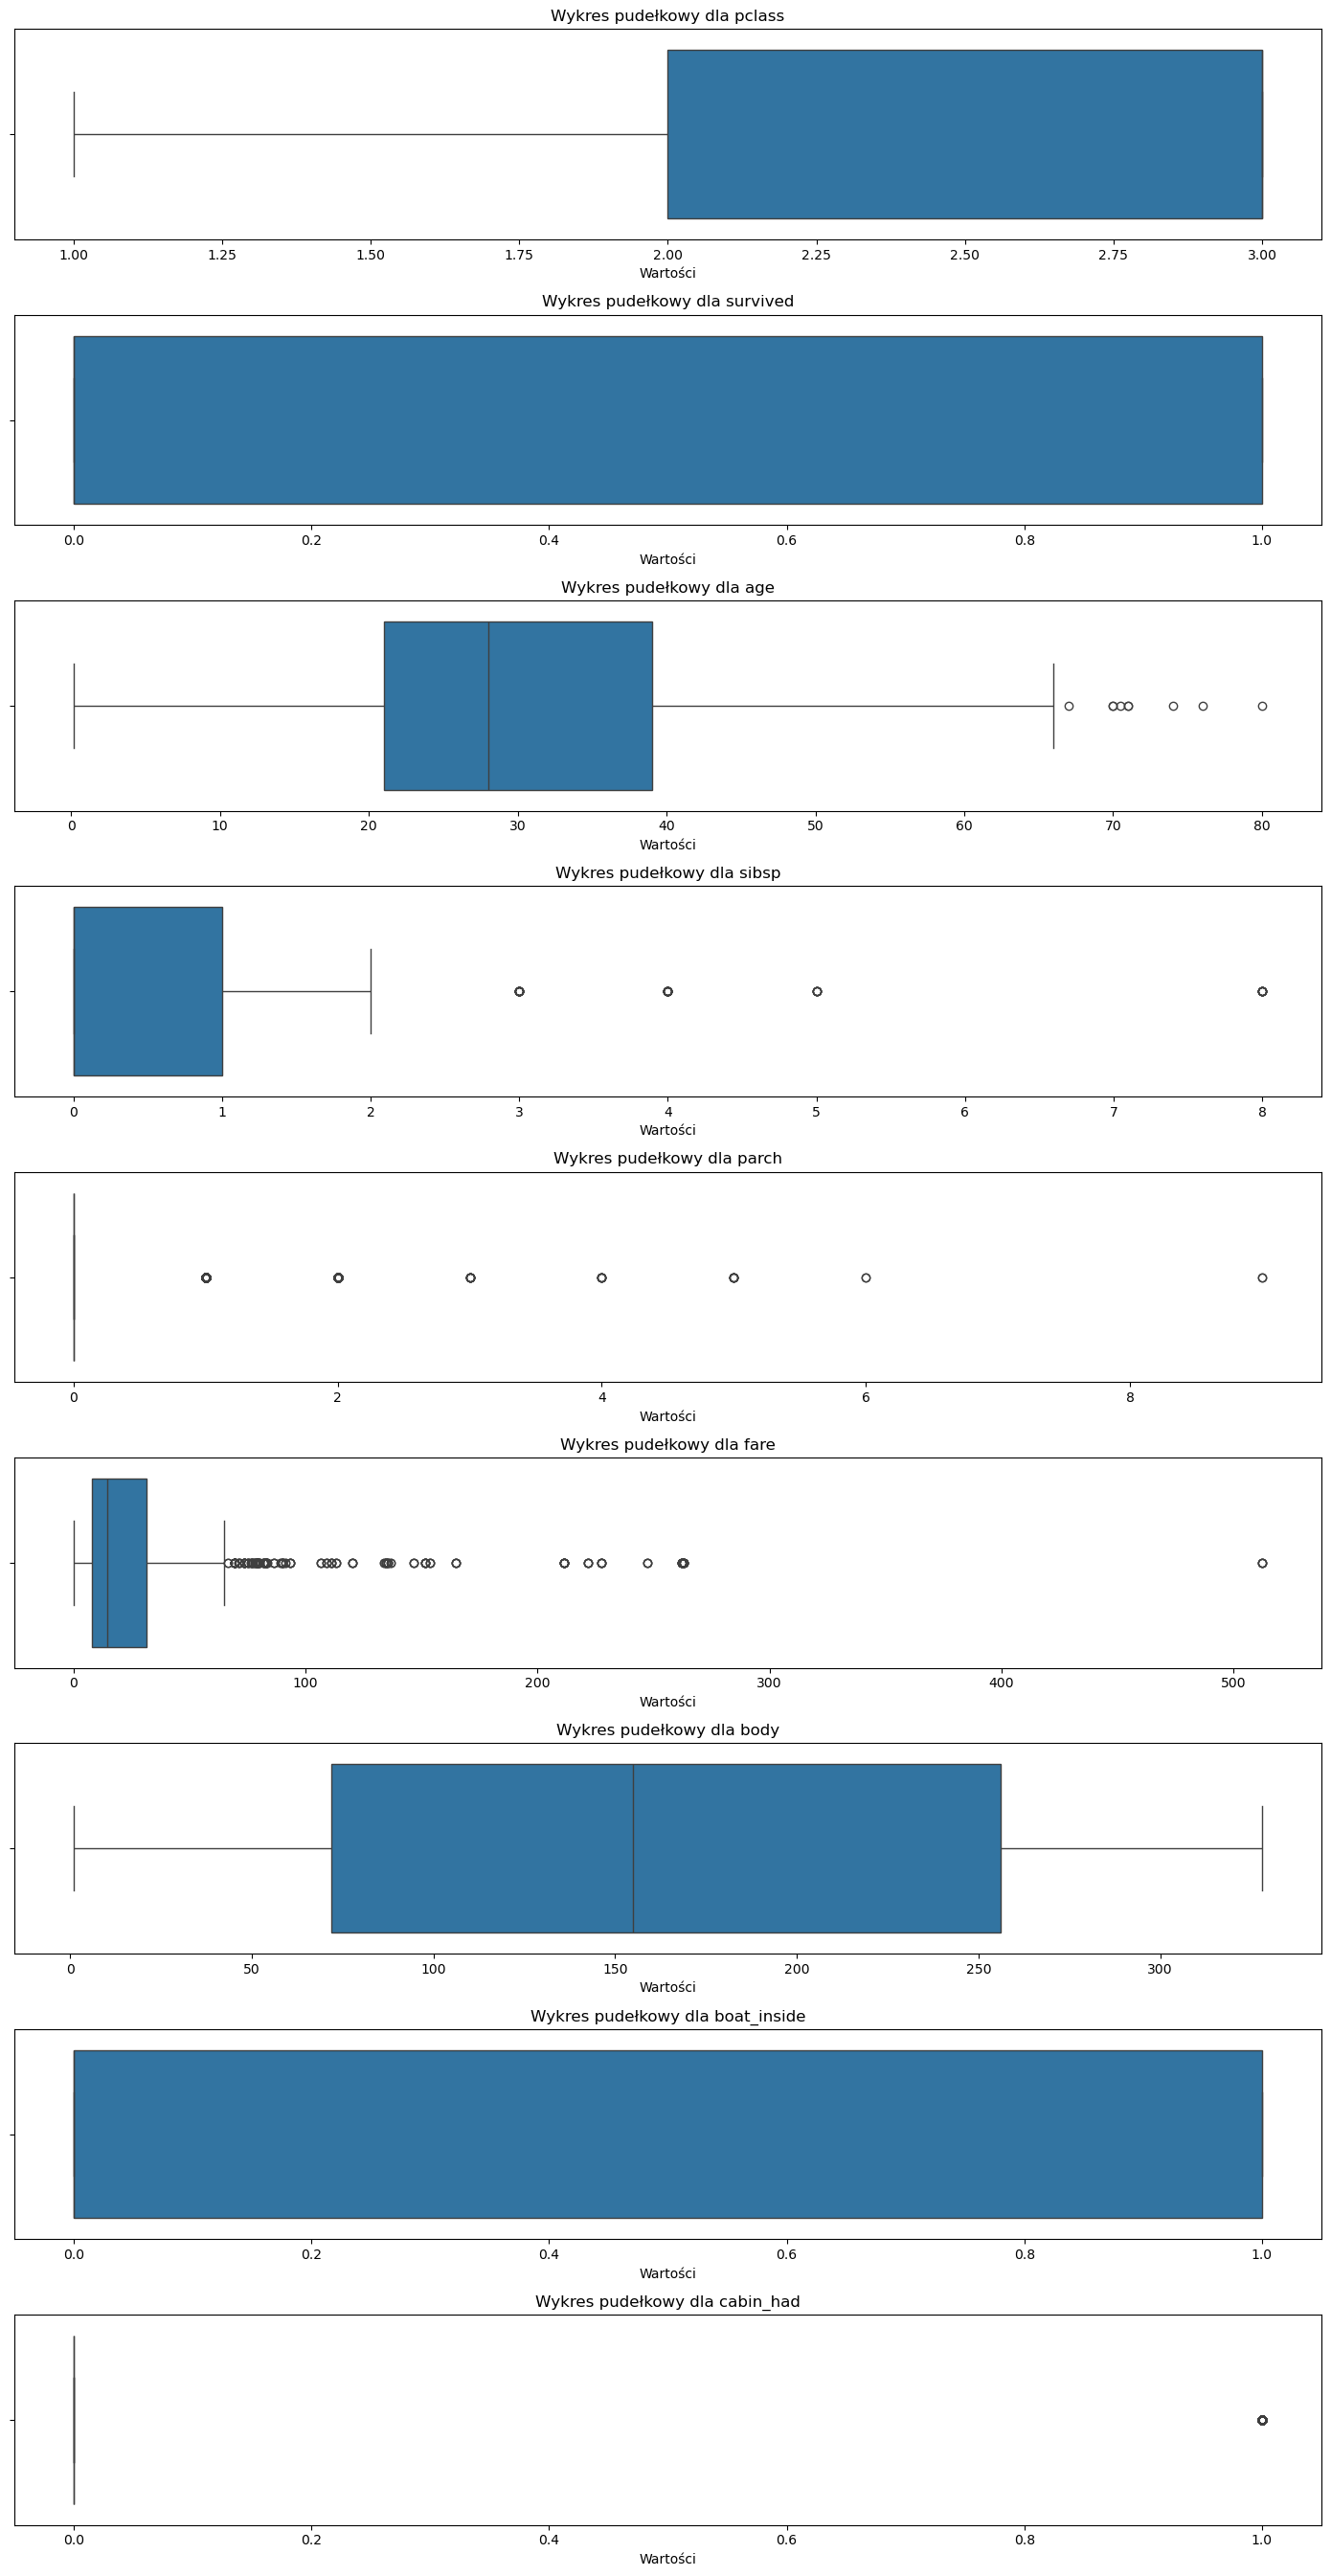

In [223]:
# Wybieranie tylko kolumn numerycznych
numeric_df = df.select_dtypes(include=['number'])

# Tworzenie wykresów pudełkowych dla każdej kolumny numerycznej
n_cols = numeric_df.shape[1]
fig, axes = plt.subplots(n_cols, 1, figsize=(14, 3 * n_cols))

for i, column in enumerate(numeric_df.columns):
    # Tworzenie wykresu pudełkowego z osobną osią dla każdej kolumny
    sns.boxplot(data=numeric_df, x=column, ax=axes[i])
    
    # Ustawienie tytułu wykresu
    axes[i].set_title(f'Wykres pudełkowy dla {column}')
    axes[i].set_xlabel('Wartości')

# Wyświetlanie wszystkich wykresów
plt.tight_layout()
plt.show()


## 6.1 Wnioski

- Najwięcej pasażerów ponad połowa znajduje się w wieku od 20 do 40 lat. Osoby młodsze do 0 roku urodzenia(prawdopodobnie kobiety w ciąży) do 20 oraz starsze od 40 do ok. 65 lat mieszą się w drugiej połowie wszystkich pasażerów. Po 65 roku życia występuje kilka wartości odstających, są to osoby o wiele starsze, których w stosunku do całości pasażerów było bardzo mało i na tle wszystkich to pojedyncze osoby. Przy dalszej analizie należy brać pod uwagę, że może to mieć wpływ na wynik.
- Duża ilość wartości odstające wynikające z ceny biletu występują ze względu na to że większość pasażerów podróżowała 3 klasą, a cena biletu w pierwszej klasie była wyraźnie wyższa i takie bilety posiadało mniej osób. Występują również wartości odstające wyraźnie od pozostałych, które należy sprawdzić i wziąć pod uwagę przy dalszej pracy z danymi.

# 7. Podsumowanie

Z przeprowadzonej analizy danych o pasażerach Titanica wynika, że klasa biletu, wiek, płeć oraz obecność rodziny miały wpływ na przeżywalność. Pasażerowie pierwszej klasy, którzy mieli dostęp do kabin i łodzi ratunkowych, mieli wyższe szanse na przeżycie. Dzieci(dziewczynki, a chłopcy do 10 lat) oraz kobiety, także miały większą przeżywalność. Większość pasażerów podróżowała w trzeciej klasie i można zauważyć ich większą śmiertelność. Dane zawierają kilka odstających wartości, które nie mają znaczącego wpływu na ogólną analizę, ale wymagają dalszej uwagi. Z zaobserwowanych wartości odstających wyłaniają się głównie ceny biletu, gdzie pasażerowie pierwszej klasy wydali znacznie więcej.




## Notatki
Nie spodziewałem się, że taka analiza danych może zaciekawić co mi z tego wyjdzie, jestem pozytywnie zaskoczony.. W sumie widzę że mogłbym pociągnąć tutaj jeszcze na pewno kilka kwestii i sprawdzać inne rzeczy, ale już z tyłu głowy ciągnie mnie do następnego rozdziału, a jeszcze przede mną 3 zadanie domowe z tego modułu, więc uznałem że wystaczająco wymęczyłem temat Titanica. Oczywiście jeżeli dostanę sugestię, że jednak powinienem jeszcze popracować przy tym zadaniu, to pociągnę temat dalej ;)

Jedna sprawa, którą chciałbym się dopytać.
- Robiąc zbiorcze wykresy(w tym przypadku punkt 5.1) dość długo się ładują. Czy jest to normalne? Jest to spowodowane słabym laptopem czy przegiętym kodem, który jest zbyt skomplikowany? Jeżeli to kod czy należy go upraszczać żeby krócej to się ładowało?
- Może jest to spowodowane błędem, który wyskakiwał mi "UserWarning: KDE cannot be estimated for a dataset with less than 2 points.", a który wyłączyłem poprzez: "# Wyłączenie ostrzeżeń związanych z KDE"
- Niby YodaGPT mówi "Jeśli Twój kod wykonuje operacje na dużych zbiorach danych lub generuje wykresy, które wymagają dużej ilości obliczeń (np. gęstość jądra, KDE), to może to spowodować opóźnienia, zwłaszcza przy bardziej skomplikowanych wykresach.", ale jakbyś mógł proszę powiedz czy w moim przypadku są one rzeczywiście skomplikowane, bo nie mam punktu odniesienia.

Z góry dziękuję za odpowiedź :) 
